In [26]:
!pip install tensorflow
!pip install scikeras
# !pip install --force-reinstall -v "scikeras==0.12.0"

  Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl (10.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [43]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [72]:
df = pd.read_csv("final_df.csv")

In [73]:
label_df = df[["TotalTransaction", 'TotalNominalTransaction', 'Last1MonthTransaction', 'Last1MothNominal','review_rating', 'review_count']]
label_df

,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,review_rating,review_count
0,15225,1772000,24,447000,4.000.000,4
1,15318,6458500,41,2248000,4.400.000,190
2,15325,930000,7,186000,4.900.000,7
3,15325,1213000,5,630500,4.100.000,33
4,15413,12818000,129,2630000,4.400.000,14
...,...,...,...,...,...,...
2504,15220,1088729,7,491000,5.000.000,4
2505,15228,1086891979,403,270673633,4.400.000,343
2506,15310,3465000,165,1816000,5.000.000,1
2507,15344,2687000,8,440000,4.600.000,60


In [74]:
df = df.drop(columns=['Unnamed: 0',"TotalTransaction", 'TotalNominalTransaction', 'Last1MonthTransaction', 
                      'review_rating', 'review_count','Unnamed: 0.1'])
# "geocoded_kelurahan_alternative","Kelurahan", 'jumlah_Unclassified_per_kelurahan',
df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category,Last1MothNominal,market_share,category_density_in_area,competition_index,density_x_population
0,5,False,False,False,False,True,False,False,False,False,...,1,60,976949084,4.110874,Kafe dan Minuman,447000,0.000458,0.083333,0.416667,2230.333333
1,2,False,False,False,False,False,False,False,False,False,...,3,177,2297219696,5.181784,Otomotif,2248000,0.000979,0.011299,0.022599,329.774011
2,10,False,False,False,False,False,False,False,False,False,...,0,28,153064649,3.367296,Restoran Umum,186000,0.001215,0.357143,3.571429,7300.714286
3,2,True,False,False,False,False,False,False,False,False,...,2,70,813504922,4.262680,Apotek dan Produk Kesehatan Lainnya,630500,0.000775,0.028571,0.057143,374.714286
4,25,False,False,False,False,False,False,False,False,False,...,5,49,232321665,3.912023,Restoran Umum,2630000,0.011321,0.510204,12.755102,26436.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,7,False,False,False,False,False,False,False,False,False,...,1,69,525602305,4.248495,Retail,491000,0.000934,0.101449,0.710145,2848.492754
2505,1,False,False,False,False,False,False,False,True,False,...,7,57,829581740,4.060443,Materials,270673633,0.326277,0.017544,0.017544,383.350877
2506,8,False,False,False,False,True,False,False,False,False,...,1,44,421505251,3.806662,Kafe dan Minuman,1816000,0.004308,0.181818,1.454545,3746.363636
2507,9,False,False,False,False,False,False,False,False,False,...,0,31,60142072,3.465736,Retail,440000,0.007316,0.290323,2.612903,4406.225806


In [75]:
df['category'].value_counts()

category
Restoran Umum                          1038
Retail                                  384
Kafe dan Minuman                        267
Regional                                230
Roti, Kue, dan Cemilan Lainnya          136
Apotek dan Produk Kesehatan Lainnya      89
Peralatan dan Barang Elektronik          67
Kosmetik                                 54
Kebersihan                               50
Otomotif                                 40
Warung                                   35
Printing                                 28
Materials                                19
Clothing                                 15
Olahraga                                 14
Properti                                 11
Optics                                   11
Jasa                                     10
Entertainment                             7
Photo                                     3
Transportation                            1
Name: count, dtype: int64

In [76]:
df = df[df['category'].isin(['Restoran Umum', 'Kafe dan Minuman', 'Regional', 'Roti, Kue, dan Cemilan Lainnya'])]

In [77]:
df.shape

(1671, 85)

In [22]:
df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'Kelurahan', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       

In [63]:
final_df = df.drop(columns=['Last1MothNominal','Kelurahan','category','market_share'])
# "geocoded_kelurahan_alternative","Kelurahan", 'jumlah_Unclassified_per_kelurahan',
final_df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population
0,5,False,False,False,False,True,False,False,False,False,...,1,5,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333
1,2,False,False,False,False,False,False,False,False,False,...,0,3,9,3,177,2297219696,5.181784,0.011299,0.022599,329.774011
2,10,False,False,False,False,False,False,False,False,False,...,1,1,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286
3,2,True,False,False,False,False,False,False,False,False,...,1,0,0,2,70,813504922,4.262680,0.028571,0.057143,374.714286
4,25,False,False,False,False,False,False,False,False,False,...,0,2,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,7,False,False,False,False,False,False,False,False,False,...,22,2,0,1,69,525602305,4.248495,0.101449,0.710145,2848.492754
2505,1,False,False,False,False,False,False,False,True,False,...,10,4,1,7,57,829581740,4.060443,0.017544,0.017544,383.350877
2506,8,False,False,False,False,True,False,False,False,False,...,0,0,2,1,44,421505251,3.806662,0.181818,1.454545,3746.363636
2507,9,False,False,False,False,False,False,False,False,False,...,0,4,2,0,31,60142072,3.465736,0.290323,2.612903,4406.225806


In [24]:
X = final_df.values
Y = df["Last1MothNominal"].values

In [6]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input

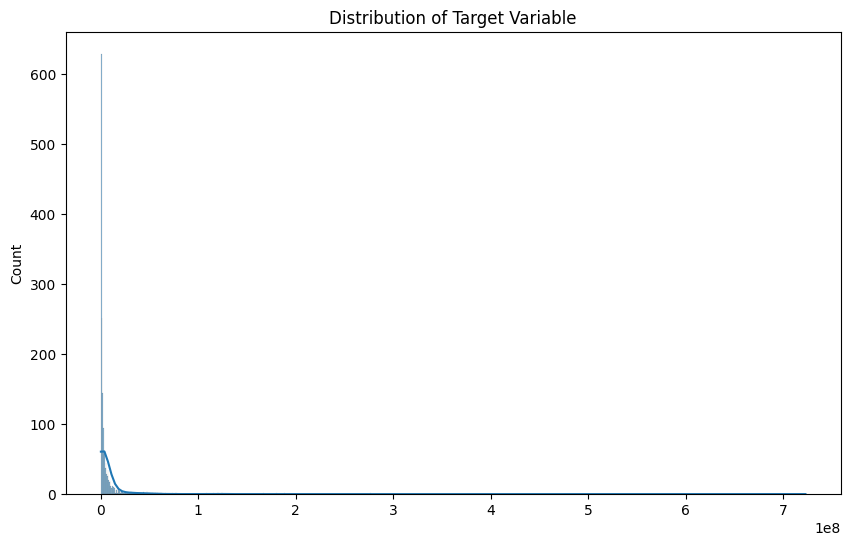

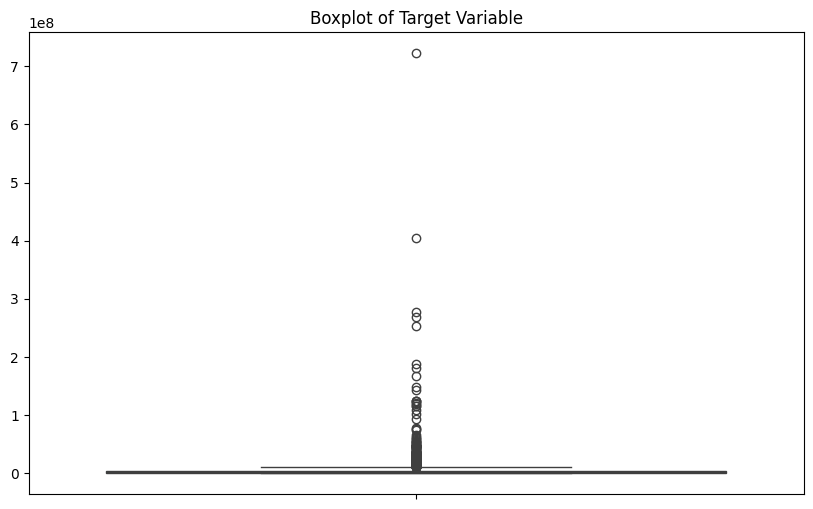

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

plt.figure(figsize=(10, 6))
sns.histplot(Y, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(Y)
plt.title('Boxplot of Target Variable')
plt.show()

In [27]:
Q1 = np.percentile(Y, 25)
Q3 = np.percentile(Y, 75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

outliers = np.where((Y < lower_bound) | (Y > upper_bound))[0]
print(f"Number of outliers: {len(outliers)}")
print(f"Indices of outliers: {outliers}")

Lower bound: -5893623.75
Upper bound: 10795374.25
Number of outliers: 186
Indices of outliers: [   4    9   14   36   42   88   91  106  132  136  144  154  155  160
  174  193  212  216  232  233  234  257  268  276  290  307  318  319
  320  322  339  344  352  354  357  359  379  382  404  413  437  451
  453  454  481  496  497  504  505  511  515  523  526  553  555  564
  569  599  630  633  635  651  655  662  663  665  670  692  697  731
  733  740  742  759  761  763  778  791  794  807  816  820  826  849
  852  855  911  916  917  922  939  943  951  959  963  972  974  997
  998  999 1006 1013 1017 1019 1025 1031 1040 1063 1065 1066 1080 1087
 1099 1100 1110 1114 1120 1142 1153 1156 1161 1166 1182 1183 1190 1195
 1199 1201 1215 1216 1226 1227 1241 1248 1256 1259 1263 1288 1302 1304
 1309 1315 1322 1330 1348 1358 1366 1380 1393 1401 1402 1404 1416 1420
 1426 1429 1434 1437 1457 1459 1461 1468 1474 1486 1495 1496 1499 1540
 1541 1544 1546 1547 1552 1565 1568 1577 1578 1617 16

In [28]:
Y_clean = Y[(Y >= lower_bound) & (Y <= upper_bound)]
X_clean = X[(Y >= lower_bound) & (Y <= upper_bound)]

In [39]:
z_scores = np.abs(stats.zscore(Y))
z_score_threshold = 3
outliers_z = np.where(z_scores > z_score_threshold)[0]
print(f"Number of outliers (Z-score method): {len(outliers_z)}")
print(f"Indices of outliers (Z-score method): {outliers_z}")

Number of outliers (Z-score method): 34
Indices of outliers (Z-score method): [ 153  286  361  364  545  623  739  922 1039 1151 1185 1383 1388 1398
 1404 1455 1478 1504 1508 1511 1611 1718 1746 1808 1825 2189 2213 2246
 2250 2314 2321 2447 2467 2505]


In [40]:
# # Method 2: Z-score
# Y_clean = Y[z_scores <= z_score_threshold]
# X_clean = X[z_scores <= z_score_threshold]

In [29]:
print(f"Original dataset size: {len(Y)}")
print(f"Cleaned dataset size: {len(Y_clean)}")

Original dataset size: 1671
Cleaned dataset size: 1485


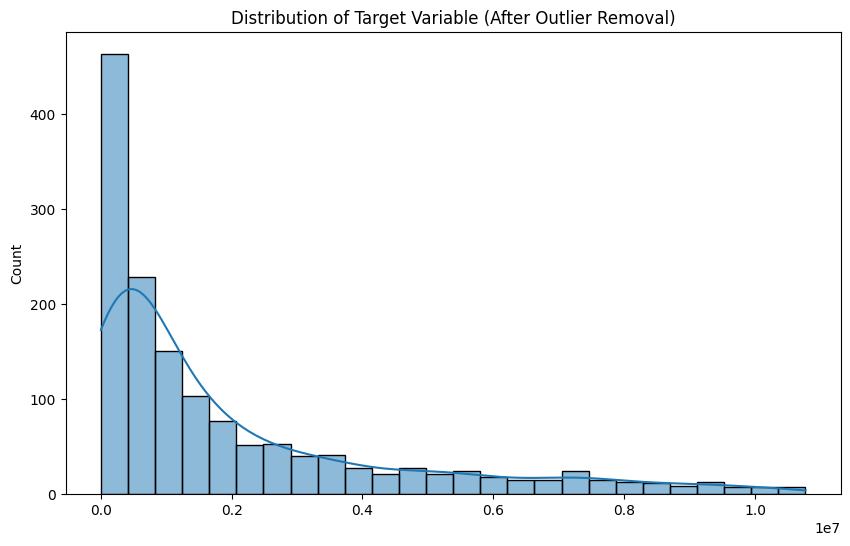

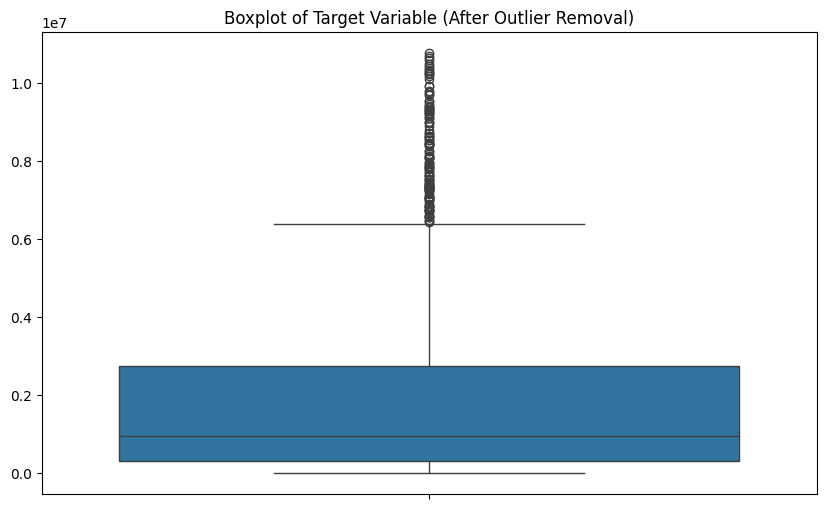

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(Y_clean, kde=True)
plt.title('Distribution of Target Variable (After Outlier Removal)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(Y_clean)
plt.title('Boxplot of Target Variable (After Outlier Removal)')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
# X_transformed = scaler.fit_transform(X_clean)
# # Y_transformed = scaler.transform()

In [32]:
df = pd.DataFrame(data=X_clean,columns=final_df.columns)
df

,kompetitor_in_kelurahan,Kafe dan Minuman,Regional,Restoran Umum,"Roti, Kue, dan Cemilan Lainnya",Warung,jumlah_penduduk_akhir_2023,penduduk_laki2,penduduk_perempuan,penduduk_beragama_islam,...,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population
0,5,True,False,False,False,False,26764,13316,13448,24412,...,1,5,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333
1,10,False,False,True,False,False,20442,5486,1308,12966,...,1,1,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286
2,25,False,False,True,False,False,51816,25906,25910,49325,...,0,2,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694
3,7,False,True,False,False,False,13115,3708,788,10923,...,1,0,0,2,70,813504922,4.26268,0.1,0.7,1311.5
4,35,False,False,True,False,False,21745,10886,10859,20120,...,0,1,3,0,118,1117329786,4.779123,0.29661,10.381356,6449.788136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,17,False,False,True,False,False,8350,2173,524,6889,...,0,0,0,0,24,179915832,3.218876,0.708333,12.041667,5914.583333
1481,38,False,False,True,False,False,10998,5410,5588,9948,...,30,3,4,5,113,1363977410,4.736198,0.336283,12.778761,3698.442478
1482,13,False,True,False,False,False,53920,26601,27319,46781,...,0,0,0,0,137,1453742682,4.927254,0.094891,1.233577,5116.49635
1483,23,False,False,True,False,False,28078,13911,14167,24533,...,22,2,0,1,69,525602305,4.248495,0.333333,7.666667,9359.333333


In [33]:
df["Last1MonthNominal"] = Y_clean
df

,kompetitor_in_kelurahan,Kafe dan Minuman,Regional,Restoran Umum,"Roti, Kue, dan Cemilan Lainnya",Warung,jumlah_penduduk_akhir_2023,penduduk_laki2,penduduk_perempuan,penduduk_beragama_islam,...,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population,Last1MonthNominal
0,5,True,False,False,False,False,26764,13316,13448,24412,...,5,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333,447000
1,10,False,False,True,False,False,20442,5486,1308,12966,...,1,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286,186000
2,25,False,False,True,False,False,51816,25906,25910,49325,...,2,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694,2630000
3,7,False,True,False,False,False,13115,3708,788,10923,...,0,0,2,70,813504922,4.26268,0.1,0.7,1311.5,9787900
4,35,False,False,True,False,False,21745,10886,10859,20120,...,1,3,0,118,1117329786,4.779123,0.29661,10.381356,6449.788136,255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,17,False,False,True,False,False,8350,2173,524,6889,...,0,0,0,24,179915832,3.218876,0.708333,12.041667,5914.583333,1032000
1481,38,False,False,True,False,False,10998,5410,5588,9948,...,3,4,5,113,1363977410,4.736198,0.336283,12.778761,3698.442478,6090500
1482,13,False,True,False,False,False,53920,26601,27319,46781,...,0,0,0,137,1453742682,4.927254,0.094891,1.233577,5116.49635,3437000
1483,23,False,False,True,False,False,28078,13911,14167,24533,...,2,0,1,69,525602305,4.248495,0.333333,7.666667,9359.333333,89000


In [34]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

In [17]:
# df = final_df

In [21]:
testString ="4.000.000"
def remove_nth_character(string, n):
  return string[:n] + string[n+1:]

print(remove_nth_character(testString,5))

4.000000


In [22]:
df['review_rating'] = df["review_rating"].apply(lambda x: remove_nth_character(x,5))
df

,Unnamed: 0,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,...,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,review_rating,review_count
0,0,5,False,False,False,False,True,False,False,False,...,1,5,0,1,15225,1772000,24,447000,4.000000,4
1,1,2,False,False,False,False,False,False,False,False,...,0,3,9,3,15318,6458500,41,2248000,4.400000,190
2,2,10,False,False,False,False,False,False,False,False,...,1,1,0,0,15325,930000,7,186000,4.900000,7
3,3,2,True,False,False,False,False,False,False,False,...,1,0,0,2,15325,1213000,5,630500,4.100000,33
4,4,25,False,False,False,False,False,False,False,False,...,0,2,0,5,15413,12818000,129,2630000,4.400000,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,2504,7,False,False,False,False,False,False,False,False,...,22,2,0,1,15220,1088729,7,491000,5.000000,4
2505,2505,1,False,False,False,False,False,False,False,True,...,10,4,1,7,15228,1086891979,403,270673633,4.400000,343
2506,2506,8,False,False,False,False,True,False,False,False,...,0,0,2,1,15310,3465000,165,1816000,5.000000,1
2507,2507,9,False,False,False,False,False,False,False,False,...,0,4,2,0,15344,2687000,8,440000,4.600000,60


In [31]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

ValueError: could not convert string to float: 'Pondok Karya'

In [49]:
# Identify highly correlated features
high_corr = np.abs(correlation_matrix) > 0.8
print("\nHighly correlated features:")
print(high_corr.sum() - 1)  # Subtract 1 to not count self-correlations


Highly correlated features:
kompetitor_in_kelurahan                    0
Apotek dan Produk Kesehatan Lainnya        0
Clothing                                   0
Entertainment                              0
Jasa                                       0
                                          ..
jumlah_Mall_per_kelurahan                  0
jumlah_Mosques_per_kelurahan               0
jumlah_Transportation Hub_per_kelurahan    0
jumlah_Medical Services_per_kelurahan      0
Last1MonthNominal                          0
Length: 76, dtype: int64


In [51]:
X = df.drop('Last1MonthNominal', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print("\nVIF for each feature:")
print(vif_data.sort_values('VIF', ascending=False))

C:\Users\pandu.prawira\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF for each feature:
                          feature        VIF
17                  Restoran Umum        inf
14                       Printing        inf
44               penduduk_pelajar        inf
45             penduduk_pensiunan        inf
46               penduduk_bekerja        inf
..                            ...        ...
30     penduduk_beragama_konghucu  65.958938
31  penduduk_beragama_kepercayaan  35.586115
70   jumlah_Tourist_per_kelurahan  27.924999
32         penduduk_belum_sekolah  27.194556
0         kompetitor_in_kelurahan   4.250557

[75 rows x 2 columns]


In [52]:
X.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [95]:
# define base model
def baseline_model():
    # create model
    model = Sequential([
        Input(shape=(X_transformed.shape[1],)),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

In [96]:
estimator = KerasRegressor(model=baseline_model, epochs=100, batch_size=5, verbose=0)


kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_transformed, Y_clean, cv=kfold, scoring='neg_mean_squared_error')
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -7620283285924.91 (788490367402.22) MSE


In [98]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 919.0 kB/s eta 0:00:11
   ---------------------------------------- 0.1/9.8 MB 919.0 kB/s eta 0:00:11
    --------------------------------------- 0.2/9.8 MB 1.0 MB/s eta 0:00:10
    --------------------------------------- 0.2/9.8 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.8 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.5/9.8 MB 1.6 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.8 MB 1.6 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.8 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/9.8 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/9.8 MB 2.3 MB/s eta 0:00:04
   ------ --------------------------------- 1.5/9.8 MB 2.8 MB/s eta 0:00:04
   ------- -----------

In [100]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

TypeError: C variable sklearn.utils._random.DEFAULT_SEED has wrong signature (expected __pyx_t_7sklearn_5utils_7_random_UINT32_t, got __pyx_t_7sklearn_5utils_9_typedefs_uint32_t)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   kompetitor_in_kelurahan                       2235 non-null   object
 1   Apotek dan Produk Kesehatan Lainnya           2235 non-null   object
 2   Clothing                                      2235 non-null   object
 3   Entertainment                                 2235 non-null   object
 4   Jasa                                          2235 non-null   object
 5   Kafe dan Minuman                              2235 non-null   object
 6   Kebersihan                                    2235 non-null   object
 7   Kosmetik                                      2235 non-null   object
 8   Materials                                     2235 non-null   object
 9   Olahraga                                      2235 non-null   object
 10  

In [54]:
df.isnull().sum()

kompetitor_in_kelurahan                    0
Apotek dan Produk Kesehatan Lainnya        0
Clothing                                   0
Entertainment                              0
Jasa                                       0
                                          ..
jumlah_Mall_per_kelurahan                  0
jumlah_Mosques_per_kelurahan               0
jumlah_Transportation Hub_per_kelurahan    0
jumlah_Medical Services_per_kelurahan      0
Last1MonthNominal                          0
Length: 76, dtype: int64

In [59]:
# 2. Check for non-linear relationships
def plot_scatter_with_lowess(x, y, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y)
    sns.regplot(x=x, y=y, lowess=True, line_kws={'color': 'red'})
    plt.title(title)
    plt.show()

for column in df.select_dtypes(include=[np.number]).columns:
    if column != 'Last1MonthNominal':
        plot_scatter_with_lowess(df[column], df['Last1MonthNominal'], f'{column} vs Last1MonthNominal')


In [61]:
df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [62]:
# 3. Feature engineering examples
public_places_array = ["jumlah_Parks_per_kelurahan",'jumlah_Temporary Accomodations_per_kelurahan',
       'jumlah_Churches_per_kelurahan',
       'jumlah_Academic Institutions_per_kelurahan',
       'jumlah_Gas/SPBU_per_kelurahan', 'jumlah_Market_per_kelurahan',
       'jumlah_Offices_per_kelurahan', 'jumlah_Residences_per_kelurahan',
       'jumlah_Tourist_per_kelurahan', 'jumlah_Mall_per_kelurahan',
       'jumlah_Mosques_per_kelurahan',
       'jumlah_Transportation Hub_per_kelurahan',
       'jumlah_Medical Services_per_kelurahan',]
df['total_public_places'] = df[public_places_array].sum(axis=1)

# df['merchant_density'] = df['kompetitor_in_kelurahan'] / df['total_public_places']

ZeroDivisionError: division by zero

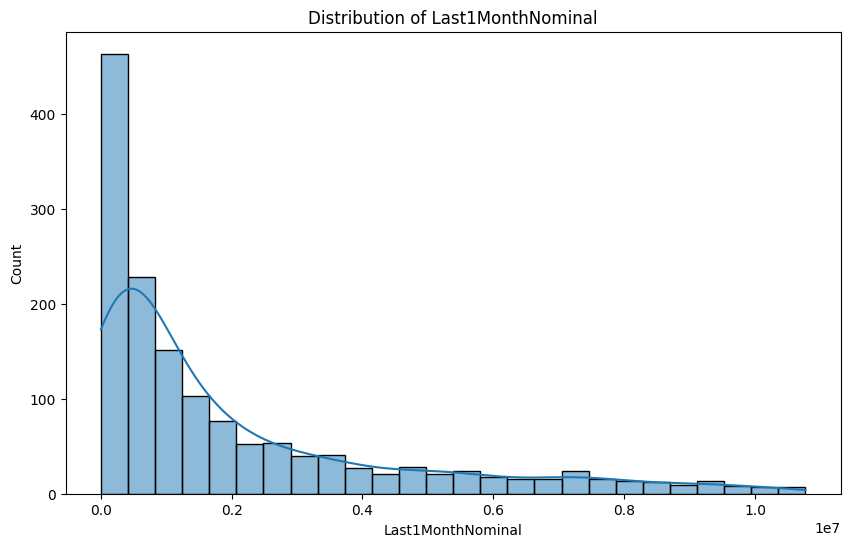

In [35]:
def plot_distribution(data, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

plot_distribution(df, 'Last1MonthNominal')

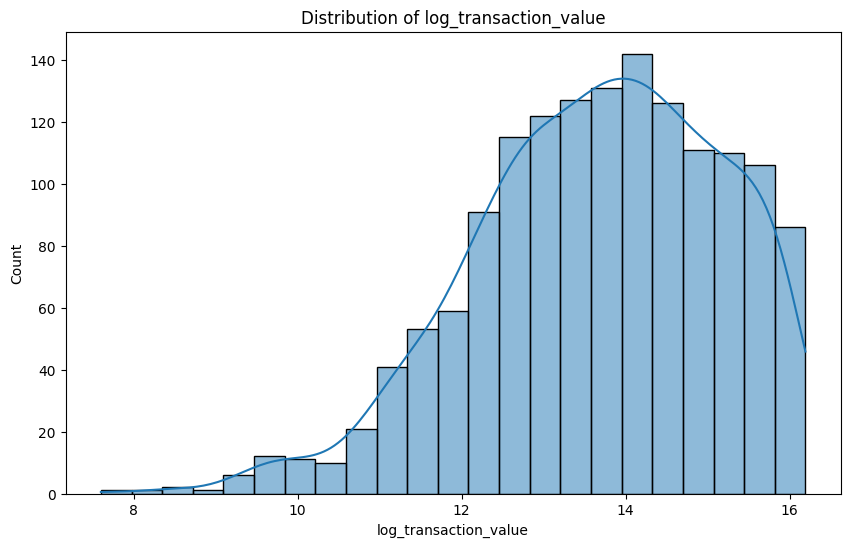

In [36]:
df['log_transaction_value'] = np.log1p(df['Last1MonthNominal'])
plot_distribution(df, 'log_transaction_value')

In [37]:
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [38]:
# Use Yeo-Johnson transform on features
pt = PowerTransformer(method='yeo-johnson')
df_transformed = pd.DataFrame(pt.fit_transform(df.select_dtypes(include=[np.number])), 
                              columns=df.select_dtypes(include=[np.number]).columns)

In [39]:
df

,kompetitor_in_kelurahan,Kafe dan Minuman,Regional,Restoran Umum,"Roti, Kue, dan Cemilan Lainnya",Warung,jumlah_penduduk_akhir_2023,penduduk_laki2,penduduk_perempuan,penduduk_beragama_islam,...,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population,Last1MonthNominal,log_transaction_value
0,5,True,False,False,False,False,26764,13316,13448,24412,...,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333,447000,13.010316
1,10,False,False,True,False,False,20442,5486,1308,12966,...,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286,186000,12.133507
2,25,False,False,True,False,False,51816,25906,25910,49325,...,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694,2630000,14.782495
3,7,False,True,False,False,False,13115,3708,788,10923,...,0,2,70,813504922,4.26268,0.1,0.7,1311.5,9787900,16.096658
4,35,False,False,True,False,False,21745,10886,10859,20120,...,3,0,118,1117329786,4.779123,0.29661,10.381356,6449.788136,255000,12.449023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,17,False,False,True,False,False,8350,2173,524,6889,...,0,0,24,179915832,3.218876,0.708333,12.041667,5914.583333,1032000,13.847010
1481,38,False,False,True,False,False,10998,5410,5588,9948,...,4,5,113,1363977410,4.736198,0.336283,12.778761,3698.442478,6090500,15.622241
1482,13,False,True,False,False,False,53920,26601,27319,46781,...,0,0,137,1453742682,4.927254,0.094891,1.233577,5116.49635,3437000,15.050110
1483,23,False,False,True,False,False,28078,13911,14167,24533,...,0,1,69,525602305,4.248495,0.333333,7.666667,9359.333333,89000,11.396403


In [40]:
df_transformed

,Last1MonthNominal,log_transaction_value
0,-0.526316,-0.523736
1,-1.040009,-1.045409
2,0.721813,0.728504
3,1.865022,1.841203
4,-0.862254,-0.864809
...,...,...
1480,0.025170,0.033389
1481,1.428294,1.420588
1482,0.938161,0.941917
1483,-1.426405,-1.437167


In [41]:
X = df.drop(['Last1MonthNominal', 'log_transaction_value','Warung'], axis=1)
y = df['log_transaction_value']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)
print("\nTop 10 important features:")
print(feature_importance.head(10))


Top 10 important features:
                            feature  importance
0              density_x_population    0.089935
1          category_density_in_area    0.081217
2                 competition_index    0.071462
3                  Kafe dan Minuman    0.060926
4           kompetitor_in_kelurahan    0.047747
5  sum_transaction_nominal_per_area    0.044788
6                    penduduk_d1_d2    0.026978
7                       penduduk_SD    0.026892
8                          Regional    0.026340
9           penduduk_beragama_hindu    0.025900


In [76]:
y.describe()

count    2235.000000
mean       13.791472
std         1.515156
min         7.601402
25%        12.771389
50%        13.929733
75%        14.993229
max        16.295572
Name: log_transaction_value, dtype: float64

In [77]:
df["Last1MonthNominal"].describe()

count    2.235000e+03
mean     2.294280e+06
std      2.729081e+06
min      2.000000e+03
25%      3.520000e+05
50%      1.121000e+06
75%      3.247000e+06
max      1.194200e+07
Name: Last1MonthNominal, dtype: float64

In [42]:
# 9. Model performance
scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"\nRandom Forest RMSE: {rmse_scores.mean()} (+/- {rmse_scores.std() * 2})")


Random Forest RMSE: 1.5936340715680408 (+/- 0.1171904928488998)


In [75]:
X.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [79]:
import pickle

In [80]:
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [49]:
df.head()

,kompetitor_in_kelurahan,Kafe dan Minuman,Regional,Restoran Umum,"Roti, Kue, dan Cemilan Lainnya",jumlah_penduduk_akhir_2023,penduduk_laki2,penduduk_perempuan,penduduk_beragama_islam,penduduk_beragama_kristen,...,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population,Last1MonthNominal,log_transaction_value
0,5,True,False,False,False,26764,13316,13448,24412,1110,...,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333,447000,13.010316
1,10,False,False,True,False,20442,5486,1308,12966,3112,...,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286,186000,12.133507
2,25,False,False,True,False,51816,25906,25910,49325,1722,...,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694,2630000,14.782495
3,7,False,True,False,False,13115,3708,788,10923,1040,...,0,2,70,813504922,4.26268,0.1,0.7,1311.5,9787900,16.096658
4,35,False,False,True,False,21745,10886,10859,20120,840,...,3,0,118,1117329786,4.779123,0.29661,10.381356,6449.788136,255000,12.449023


In [50]:
X = df.drop(['Last1MonthNominal','log_transaction_value'],axis=1)
y = df['log_transaction_value']

RMSE on original scale: 2841508.652647334
MAE on original scale: 1762880.1566216315
R2 Score: -0.24300450407118923
Mean Percentage Error: 255.99878530060084%
Median Percentage Error: 81.24733439597148%


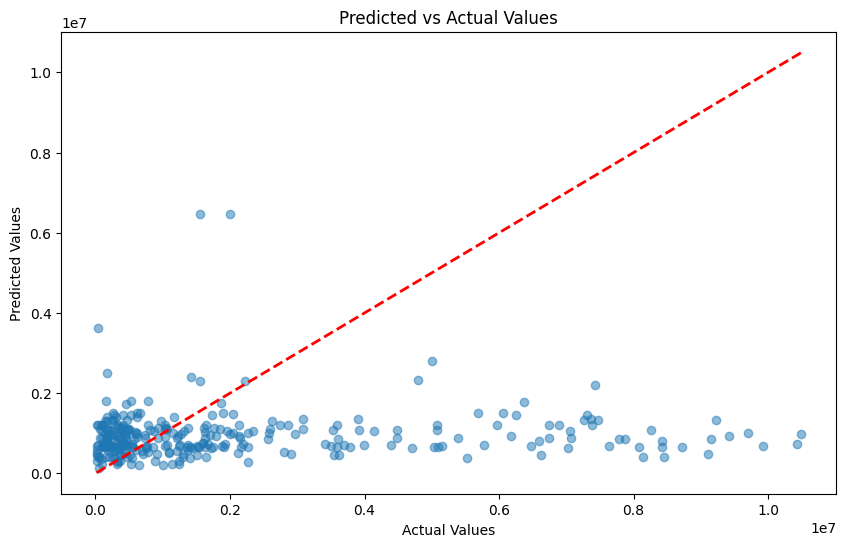

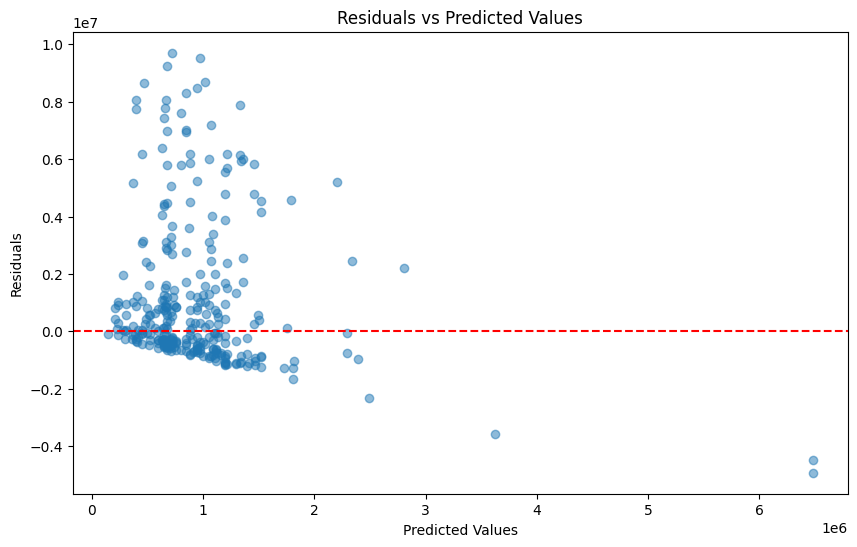


Top 10 important features:
                            feature  importance
0              density_x_population    0.086500
1          category_density_in_area    0.085215
2                 competition_index    0.077657
3                  Kafe dan Minuman    0.057172
4           kompetitor_in_kelurahan    0.051376
5  sum_transaction_nominal_per_area    0.037814
6               penduduk_5_sampai_9    0.024710
7    Roti, Kue, dan Cemilan Lainnya    0.023782
8           penduduk_beragama_hindu    0.023705
9                       penduduk_SD    0.022860


In [53]:
# Assuming you have your features in X and log-transformed target in y_log
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_log)

# Make predictions
y_pred_log = rf_model.predict(X_test)

# Back-transform predictions and actual values
y_pred = np.exp(y_pred_log) - 1  # Assuming you used np.log1p for transformation
y_test = np.exp(y_test_log) - 1

# Calculate metrics on the original scale
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE on original scale: {rmse}")
print(f"MAE on original scale: {mae}")
print(f"R2 Score: {r2}")

# Calculate percentage error
percentage_error = np.abs((y_test - y_pred) / y_test) * 100
mean_percentage_error = np.mean(percentage_error)
median_percentage_error = np.median(percentage_error)

print(f"Mean Percentage Error: {mean_percentage_error}%")
print(f"Median Percentage Error: {median_percentage_error}%")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

# Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)
print("\nTop 10 important features:")
print(feature_importance.head(10))

# YES FFUUCK YEY wkwk

In [84]:
!pip install xgboost
!pip install lightgbm

In [145]:
df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [85]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import HuberRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

In [143]:
len(X.columns)

81

In [140]:
X = df.drop('Last1MonthNominal',axis=1)

In [54]:
y = df['Last1MonthNominal']
y

0        447000
1        186000
2       2630000
3       9787900
4        255000
         ...   
1480    1032000
1481    6090500
1482    3437000
1483      89000
1484    1816000
Name: Last1MonthNominal, Length: 1485, dtype: int64

In [ ]:
# Feature engineering based on business density
def engineer_density_features(df):
    # Assuming 'businesses_in_category' and 'total_businesses' columns exist
    df['category_density'] = df['businesses_in_category'] / df['total_businesses']
    df['log_businesses_in_category'] = np.log1p(df['businesses_in_category'])
    
    # Create interaction terms
    df['density_x_population'] = df['category_density'] * df['population']
    df['density_x_income'] = df['category_density'] * df['average_income']
    
    # You might need to adjust these based on your actual column names
    return df

RandomForestRegressor:
  RMSE: 2687328.772849246
  R2 Score: -0.11177355818333479
GradientBoostingRegressor:
  RMSE: 2663413.3052263698
  R2 Score: -0.09207349446199964
XGBRegressor:
  RMSE: 2693617.91080866
  R2 Score: -0.11698353290557861
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2672
[LightGBM] [Info] Number of data points in the train set: 1188, number of used features: 64
[LightGBM] [Info] Start training from score 2001761.542088
LGBMRegressor:
  RMSE: 2691765.607566143
  R2 Score: -0.11544771045694868
HuberRegressor:
  RMSE: 2682370.2954090293
  R2 Score: -0.10767460436123955
RANSACRegressor:
  RMSE: 3178414.0892878682
  R2 Score: -0.5552338171246798
SVR:
  RMSE: 2800707.378076084
  R2 Score: -0.20756413979437283
MLPRegressor:
  RMSE: 3302407.8384568333
  R2 Score: -0.6789437630543862


C:\Users\pandu.prawira\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


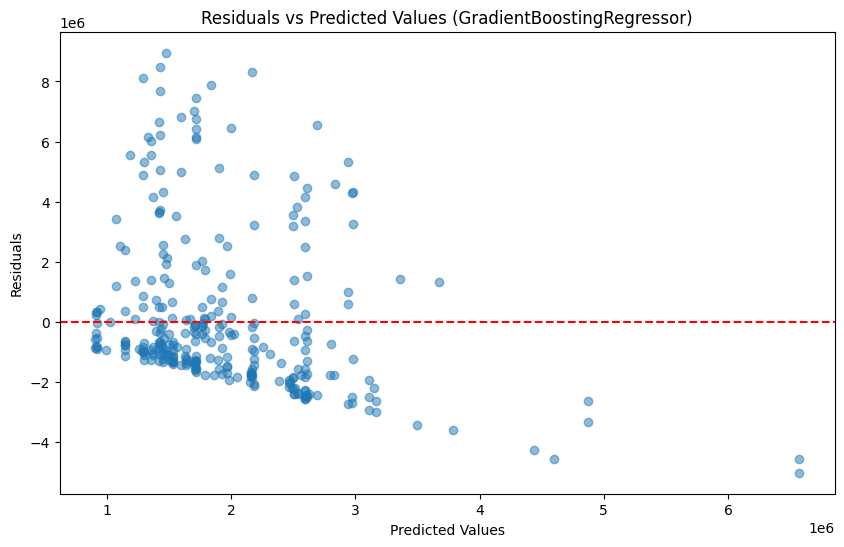


Top 10 important features:
                             feature  importance
61          category_density_in_area    0.101976
63              density_x_population    0.100745
12          penduduk_beragama_buddha    0.087607
33             penduduk_15_sampai_19    0.082014
62                 competition_index    0.069905
59  sum_transaction_nominal_per_area    0.041022
4     Roti, Kue, dan Cemilan Lainnya    0.040378
0            kompetitor_in_kelurahan    0.038329
60                    log_count_UMKM    0.036493
31               penduduk_5_sampai_9    0.033909

Cross-validation RMSE for GradientBoostingRegressor: 2510551.109587531 (+/- 374595.3002390837)


In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import HuberRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame with features and 'transaction_value' as target
# X = df.drop('transaction_value', axis=1)
# y = df['transaction_value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__}:")
    print(f"  RMSE: {np.sqrt(mse)}")
    print(f"  R2 Score: {r2}")
    return model, y_pred

# List of models to try
models = [
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(random_state=42),
    xgb.XGBRegressor(random_state=42),
    lgb.LGBMRegressor(random_state=42),
    HuberRegressor(),
    RANSACRegressor(random_state=42),
    SVR(kernel='rbf'),
    MLPRegressor(random_state=42)
]

# Evaluate each model
results = {}
for model in models:
    fitted_model, y_pred = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[model.__class__.__name__] = (fitted_model, y_pred)

# Plot residuals for the best performing model
best_model_name = max(results, key=lambda k: r2_score(y_test, results[k][1]))
_, best_y_pred = results[best_model_name]

plt.figure(figsize=(10, 6))
plt.scatter(best_y_pred, y_test - best_y_pred, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title(f"Residuals vs Predicted Values ({best_model_name})")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Feature importance for tree-based models
if isinstance(results[best_model_name][0], (RandomForestRegressor, GradientBoostingRegressor, xgb.XGBRegressor, lgb.LGBMRegressor)):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': results[best_model_name][0].feature_importances_
    }).sort_values('importance', ascending=False)
    print("\nTop 10 important features:")
    print(feature_importance.head(10))

# Cross-validation for the best model
best_model = results[best_model_name][0]
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"\nCross-validation RMSE for {best_model_name}: {cv_rmse.mean()} (+/- {cv_rmse.std() * 2})")

In [146]:
df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [154]:
df['density_x_population'].isna().sum()

0

In [149]:
final_df = df

In [158]:
for col in df.columns:
    # Check if the column exists
    if col not in df.columns:
        print(f"Warning: Column '{col}' not found in the dataframe. Skipping...")
        continue
    
    # Ensure the column is numeric
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Warning: Column '{col}' is not numeric. Attempting to convert...")
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Handle potential negative or zero values
    df[col] = df[col].clip(lower=0.0001)  # Replace negative/zero values with a small positive number

In [163]:
df = df.drop(['density_x_population_squared',
       'density_x_population_cubed', 'log_density_x_population',
       'category_density_in_area_squared', 'category_density_in_area_cubed',
       'log_category_density_in_area', 'competition_index_squared',
       'competition_index_cubed', 'log_competition_index',
       'transaction_per_business'], axis=1)

In [164]:
df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [193]:
numeric_features = ['density_x_population', 'category_density_in_area', 'competition_index',
                    'jumlah_penduduk_akhir_2023','kompetitor_in_kelurahan',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pelajar', 'penduduk_pensiunan', 'penduduk_bekerja',
       'penduduk_0_sampai_4', 'penduduk_5_sampai_9', 'penduduk_10_sampai_14',
       'penduduk_15_sampai_19', 'penduduk_20_sampai_24',
       'penduduk_25_sampai_29', 'penduduk_30_sampai_34',
       'penduduk_35_sampai_39', 'penduduk_40_sampai_44',
       'penduduk_45_sampai_49', 'penduduk_50_sampai_54',
       'penduduk_55_sampai_59', 'penduduk_60_sampai_64',
       'penduduk_65_sampai_69', 'penduduk_70_keatas',
       'jumlah_Parks_per_kelurahan',
       'jumlah_Temporary Accomodations_per_kelurahan',
       'jumlah_Churches_per_kelurahan',
       'jumlah_Academic Institutions_per_kelurahan',
       'jumlah_Gas/SPBU_per_kelurahan', 'jumlah_Market_per_kelurahan',
       'jumlah_Offices_per_kelurahan', 'jumlah_Residences_per_kelurahan',
       'jumlah_Tourist_per_kelurahan', 'jumlah_Mall_per_kelurahan',
       'jumlah_Mosques_per_kelurahan',
       'jumlah_Transportation Hub_per_kelurahan',
       'jumlah_Medical Services_per_kelurahan', 'count_UMKM',
       'sum_transaction_nominal_per_area', 'log_count_UMKM','transaction_per_business',
                   'density_x_population_squared',
       'density_x_population_cubed', 'log_density_x_population',
       'category_density_in_area_squared', 'category_density_in_area_cubed',
       'log_category_density_in_area', 'competition_index_squared',
       'competition_index_cubed', 'log_competition_index']
categorical_features = ['Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung']

print(len(categorical_features))
print(len(numeric_features))
print(len(df.columns))

21
70
92


In [95]:
numeric_features = ['kompetitor_in_kelurahan','jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan']

In [96]:
categorical_features = ['Kafe dan Minuman',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya']

In [197]:
print(len(categorical_features))
print(len(numeric_features))
print(len(df.columns))

21
70
92


In [188]:
print(df.columns)

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [198]:
# print(df.columns)
comparison_list = []
for column in df.columns:
    if column in categorical_features:
        continue
    if column in numeric_features:
        continue
    if column not in categorical_features and column not in numeric_features:
        print(column, "gamasuk boi")

for column in categorical_features:
    if column in comparison_list:
        print("duplikat", column)
    if column in df.columns:
        comparison_list.append(column)
        continue
    print("gamasuk boi", column)
print(comparison_list)

for column in numeric_features:
    if column in comparison_list:
        print("duplikat", column)
    if column in df.columns:
        comparison_list.append(column)
        continue
    print("gamasuk boi", column)

Last1MonthNominal gamasuk boi
['Apotek dan Produk Kesehatan Lainnya', 'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan', 'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif', 'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti', 'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya', 'Transportation', 'Warung']


In [184]:
print("da")

da


In [58]:
df.shape

(1437, 76)

In [64]:
df = final_df

In [65]:

# Advanced feature engineering
def advanced_feature_engineering(df):
    # List of columns to transform
    columns_to_transform = ['density_x_population', 'category_density_in_area', 'competition_index']
    
    for col in columns_to_transform:
        # Check if the column exists
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found in the dataframe. Skipping...")
            continue
        
        # Ensure the column is numeric
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Warning: Column '{col}' is not numeric. Attempting to convert...")
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Handle potential negative or zero values
        df[col] = df[col].clip(lower=0.0001)  # Replace negative/zero values with a small positive number
        
        # Apply transformations
        df[f'{col}_squared'] = df[col] ** 2
        df[f'{col}_cubed'] = df[col] ** 3
        df[f'log_{col}'] = np.log1p(df[col])
    
    # Add other feature engineering steps here
    # For example:
    
    # Ratio features (make sure 'sum_transaction_nominal_per_area' and 'total_businesses_in_area' exist and are numeric)
    if all(col in df.columns for col in ['sum_transaction_nominal_per_area', 'count_UMKM']):
        df['transaction_per_business'] = (
            df['sum_transaction_nominal_per_area'].astype(float) / 
            df['count_UMKM'].astype(float).replace(0, 1)  # Avoid division by zero
        )
    
    return df

In [68]:
# Anomaly detection
def remove_outliers(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[z_scores < threshold]
    return df

# Prepare data
df = advanced_feature_engineering(df)
df = remove_outliers(df, ['density_x_population', 'category_density_in_area'])
# X = df.drop('Last1MonthNominal',axis=1)
X = df
X.shape

(2484, 91)

In [69]:
X.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [93]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer for log transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.log1p(X)

# Advanced feature engineering
def advanced_feature_engineering(df):
    # List of columns to transform
    columns_to_transform = ['density_x_population', 'category_density_in_area', 'competition_index']
    
    for col in columns_to_transform:
        # Check if the column exists
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found in the dataframe. Skipping...")
            continue
        
        # Ensure the column is numeric
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Warning: Column '{col}' is not numeric. Attempting to convert...")
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Handle potential negative or zero values
        df[col] = df[col].clip(lower=0.0001)  # Replace negative/zero values with a small positive number
        
        # Apply transformations
        df[f'{col}_squared'] = df[col] ** 2
        df[f'{col}_cubed'] = df[col] ** 3
        df[f'log_{col}'] = np.log1p(df[col])
    
    # Add other feature engineering steps here
    # For example:
    
    # Ratio features (make sure 'sum_transaction_nominal_per_area' and 'total_businesses_in_area' exist and are numeric)
    if all(col in df.columns for col in ['sum_transaction_nominal_per_area', 'count_UMKM']):
        df['transaction_per_business'] = (
            df['sum_transaction_nominal_per_area'].astype(float) / 
            df['count_UMKM'].astype(float).replace(0, 1)  # Avoid division by zero
        )
    
    return df


# Anomaly detection
def remove_outliers(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[z_scores < threshold]
    return df

# Prepare data
# df = advanced_feature_engineering(df)
# df = remove_outliers(df, ['Last1MonthNominal', 'density_x_population', 'category_density_in_area'])

X = new_df.drop(['category','Last1MothNominal'], axis=1)
# y = df['Last1MonthNominal']
y = (new_df['Last1MothNominal'])

In [97]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('log', LogTransformer()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42))
])

In [98]:
# Fit model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse)}")
print(f"R2 Score: {r2}")

# def get_feature_importance(model, numeric_features, categorical_features):
#     # Get the polynomial feature names
#     poly = PolynomialFeatures(degree=2, include_bias=False)
#     poly_feature_names = poly.get_feature_names(numeric_features)
    
#     # Combine all feature names in the order they were fed to the model
#     all_feature_names = list(poly_feature_names) + categorical_features
    
#     # Get feature importances from the model
#     importances = model.named_steps['regressor'].feature_importances_
    
#     # Create a DataFrame with feature names and their importances
#     feature_importance = pd.DataFrame({
#         'feature': all_feature_names,
#         'importance': importances
#     })
    
#     # Group by the original feature names and sum the importances
#     feature_importance['original_feature'] = feature_importance['feature'].apply(lambda x: x.split()[0] if '^' in x else x)
#     grouped_importance = feature_importance.groupby('original_feature')['importance'].sum().reset_index()
    
#     # Sort by importance
#     grouped_importance = grouped_importance.sort_values('importance', ascending=False)
    
#     return grouped_importance

# # After fitting your model, use this function:
# feature_importance = get_feature_importance(model, numeric_features, categorical_features)

# print("\nTop 10 important features:")
# print(feature_importance.head(10))

# # Optionally, visualize the feature importances
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.bar(feature_importance['original_feature'][:10], feature_importance['importance'][:10])
# plt.xticks(rotation=45, ha='right')
# plt.title('Top 10 Feature Importances')
# plt.tight_layout()
# plt.show()

RMSE: 28661168.102321032
R2 Score: -0.3181478878278512


In [70]:
df.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [ ]:
in_array = ['kompetitor_in_kelurahan', 'Kafe dan Minuman',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan']

In [84]:
new_df = df[['kompetitor_in_kelurahan', 'Kafe dan Minuman',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan','category','Last1MothNominal']]

In [89]:
new_df.head()

,kompetitor_in_kelurahan,Kafe dan Minuman,Regional,Restoran Umum,Retail,"Roti, Kue, dan Cemilan Lainnya",jumlah_penduduk_akhir_2023,penduduk_laki2,penduduk_perempuan,category,Last1MothNominal
0,5,True,False,False,False,False,26764,13316,13448,Kafe dan Minuman,447000
2,10,False,False,True,False,False,20442,5486,1308,Restoran Umum,186000
4,25,False,False,True,False,False,51816,25906,25910,Restoran Umum,2630000
6,7,False,True,False,False,False,13115,3708,788,Regional,9787900
9,6,True,False,False,False,False,26183,13035,13148,Kafe dan Minuman,66195010


In [ ]:
import seaborn as sns

# Melt the DataFrame for seaborn
melted_df = df.reset_index().melt(id_vars='Category', value_vars=['Value1', 'Value2'], var_name='Variable', value_name='Value')

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=melted_df, x='Category', y='Last1MothNominal', hue='Variable')

# Add title and labels
plt.title('Comparison of Value1 and Value2')
plt.xlabel('Category')
plt.ylabel('Values')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Values')
plt.show()